<a href="https://colab.research.google.com/github/jaxckle/Insprit_AI_2025_Learning/blob/main/Jaxon_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"><h1><b><u>MAKE A COPY OF THIS NOTEBOOK SO YOUR EDITS ARE SAVED</u></b></h1></font>


> To do this, you can click the ***Copy to Drive*** button above, or go to ***File > Save a Copy in Drive***! It should open up a new tab with your copy where you should continue your work.


---
---
# ***🚗 Linear Regression: Buying the Right Car***


Imagine this...

You've been working for a year as a data expert and finally save enough money to buy a car. Being a thrifty data expert, you want to get the best bang for your buck.

Imagine that you also have data from the car website [CarDekho](https://www.cardekho.com/), which has information on a wide variety of cars, including their price. You realize that you can use that data to make sure you get a good deal on a new car. In particular, you can figure out exactly how much you should pay for a specific type of car. This can be especially helpful if you run into a tricky car salesperson!

But how can you use the data to figure out how much you should pay? **You can utilize Linear Regression**!

Linear Regression is a method for discovering the relationship between two variables in the dataset, such as price of the car and the year it was made. Data scientists rely on this method for solving a wide range of problems, especially when it comes to prediction.

Let's get started by running the setup cell below and taking a look at the outline of the notebook!



In [ ]:
#@title **🏗 Setup Cell**
#@markdown **Run this to import libraries and download data!**

# Libraries used in this notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Our dataset is hosted on Google Cloud. Here's how we can grab it:
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202a%20-%20Linear%20Regression/car_dekho_USD.csv" -O car_dekho.csv

# Inspirit's util file and discussion exercise answer handler
if not os.path.exists('inspiritai_util.py'):
    !wget -q "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Modules/inspiritai_util.py"
from inspiritai_util import handle_discussion_response

car_dekho.csv       100%[===================>]  13.75K  --.-KB/s    in 0s      


<font color=red size="5"><b> ⬆ Click the play button before moving on! </b></font>

## Table of Contents

You can find a more detailed Table of Contents by clicking on the icon on the left sidebar that looks like this: <img src="https://drive.google.com/uc?export=view&id=1AGUz4POrRWu_6n5yI_YdO4qFRr41_PzE" width=20>.

>[📊 Milestone 1: Introducing the Data](#scrollTo=8t72KUGt0rhW)

>>[1.1. Fetching the Data](#scrollTo=d-zYd2aI8Lt4)

>>[1.2. Understanding How Data Is Represented](#scrollTo=v5GSzhiPxP61)

>>[1.3. Features of the Data](#scrollTo=xffj1ubcOrjW)

>>[1.4. Size of the Data](#scrollTo=o0baPZC2yH4U)

>[👀 Milestone 2: Visualizing the Data](#scrollTo=2Fe2IlJU9P78)

>>[2.1. Scatter Plots](#scrollTo=eNviAZfnJDoF)

>>[2.2. Categorical Plots](#scrollTo=dHgYmiyE69aG)

>[📏 Milestone 3: Applying Linear Regression](#scrollTo=GY_5ltQS4s3C)

>>[3.1. Linear Regression Review](#scrollTo=l0CXOWJs7L29)

>>[3.2. Linear Regression in Python](#scrollTo=Ee5Y4woxjNvi)

>>[(Optional) 3.3. Interpreting our Model](#scrollTo=ouYw5bRKm0I2)

>>[(Optional) 3.4. Trying Different Inputs](#scrollTo=THk4wpo_3gT1)

>>[(Optional) 3.5. Multiple Linear Regression](#scrollTo=24QbsTU_sTF3)

>[(Optional Challenge) 💰 Milestone 4: Finding The Best Deal](#scrollTo=IMkNnu3jCsnB)

>[🤔 Knowledge Check](#scrollTo=Yswq2Dyvd6jU)

>[📋 Cheat Sheets](#scrollTo=pLalweSuxGQc)



---
---

# **📊 Milestone 1: Introducing the Data**

## 1.1. Fetching the Data




We will use a very common data science library called Pandas to load the dataset into this notebook. Using `pandas` we can read the file we downloaded earlier (`'car_dekho.csv'`)

Our data is then assigned and stored as a Pandas DataFrame under the variable `car_data`, which we can then use throughout the notebook to access the dataset!


In [ ]:
# Import Pandas, a library great for table data (AKA spreadsheets, csv, etc.)
import pandas as pd

# Read the data into `car_data` using 'pd.read_csv(CSV_FILENAME)'
car_data_filename = 'car_dekho.csv'
car_data = pd.read_csv(car_data_filename)

## 1.2. Understanding How Data Is Represented

Great! Now that we have the data from CarDekho loaded into the notebook, we can start exploring it.

The cell below uses the `.head()` method on the variable we just stored the dataset in (`car_data`). This method outputs the "head" of the data, or the first few rows in the top part of the table. It outputs 5 rows by default, but you can input a number if you want to see more or fewer rows!


In [ ]:
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,4495,27000,Petrol,Dealer,Manual
1,sx4,6,6373,43000,Diesel,Dealer,Manual
2,ciaz,2,9727,6900,Petrol,Dealer,Manual
3,wagon r,8,3824,5200,Petrol,Dealer,Manual
4,swift,5,6172,42450,Diesel,Dealer,Manual


Each row corresponds to a specific car on sale and each column details information about that car. See if you can already spot any pieces of information that might help you find your perfect car.

Here is a visual representation of the dataset above:

<center>
<img src="https://i.postimg.cc/bNyjtBFT/Screen-Shot-2019-06-06-at-8-04-46-PM.png" width=750>
</center>


## 1.3. Features of the Data

Before diving deeper into the data we need to know what kind of information we have on each car. This is exactly what the columns in the data table are telling us.

You can think about these columns as being the raw ingredients of any future model we build. A good cook knows about every ingredient they are using. Likewise, we need to know about each feature (column) in our dataset. Below are brief explanations of each feature.

* `Car_Name`: The name of the car.

* `Age`: The number of years since the car was made.

* `Selling_Price`: The price the owner wants to sell the car at, in USD.

* `Kms_Driven`: The distance completed by the car in kilometers.

* `Fuel_Type`: The type of fuel the car uses: Petrol (gasoline), Diesel, or CNG (Compressed Natural Gas)

* `Seller_Type`: The seller of the car: Dealer or Individual

* `Transmission`: The car's transmission: Manual or Automatic



Using code, we can select columns in our data table to inspect them more closely. In the cell below we select the `Fuel_Type` column from our `car_data` variable:

In [ ]:
car_data[['Fuel_Type']].head(5)
#you can add .head at the end to be able to see a specific number of lines

,Fuel_Type
0,Petrol
1,Diesel
2,Petrol
3,Petrol
4,Diesel


### *1.3.1. Coding Exercise️*

In the cell below, select the `Car_Name` column from our `car_data` dataframe, and output only the first five rows.


In [ ]:
### WRITE YOUR CODE BELOW
car_data[['Car_Name']].head(5)


,Car_Name
0,ritz
1,sx4
2,ciaz
3,wagon r
4,swift


### (Optional) *1.3.2. Coding Exercise*

> Try this out if you want to make a new column for miles driven instead of kilometers driven!

If you're not very familiar with how big a kilometer is, you may prefer to instead have data on how many miles have been driven by the car. Let's see how we can add a new column called `"Miles_Driven"` to the dataset!

Here's a basic template on how you'd generally add a column to your dataframe:

```python
DATAFRAME["NEW_COLUMN_NAME"] = NEW_COLUMN
```

Using that template, and the conversion formula

$$\text{miles} \approx 0.621 * \text{kilometers}$$

how could you create this new column? Try experimenting in the code cell below, and display the dataset so you can see what has changed!

In [ ]:
### WRITE YOUR CODE BELOW
car_data['Miles_Driven']= round(car_data[['Kms_Driven']]*0.621)
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Miles_Driven
0,ritz,5,4495,27000,Petrol,Dealer,Manual,16767.0
1,sx4,6,6373,43000,Diesel,Dealer,Manual,26703.0
2,ciaz,2,9727,6900,Petrol,Dealer,Manual,4285.0
3,wagon r,8,3824,5200,Petrol,Dealer,Manual,3229.0
4,swift,5,6172,42450,Diesel,Dealer,Manual,26361.0


## 1.4. Size of the Data


Each row in the datatable represents a unique car. Using the information in the columns of the table you can select the car that best suits your taste. If we only had a few cars to choose from this would be an easy task.

To see how many rows we have in our table, let's use the `len()` function, which returns the **len**gth of whatever you give it. Run the cell below to see how much data we have in our dataset.

In [ ]:
len(car_data)
#this shows you the length of a table

301

That's a lot of cars to look at one by one!

Imagine that you are staring at a garage full of cars not knowing which one to choose. That is exactly where we are right now.

<center>
<img src="https://i.postimg.cc/15xbXsCp/ryan-searle-377260-unsplash.jpg" id="ryan-searle-377260-unsplash.jpg" width=750>
</center>

How can you make your task easier? Luckily as a data expert you can use visualization to organize the cars by the most important variables.



---
---

# **👀 Milestone 2: Visualizing the Data**


## 2.1. Scatter Plots

One way to look at the data is to use a ***scatter plot***.

> A scatter plot is a two-dimensional data visualization that uses a dot for each data point to represent the values obtained for two different features - one plotted along the $x$-axis (horizontal) and the other plotted along the $y$-axis (vertical). The $y$ feature is the one you expect is changing in response to the $x$ feature.

In the code cell below, we'll use the `scatterplot` function from the `seaborn` library (which we rename as `sns`). The code is already provided for you, but here's the typical template you would use for any dataset:

```python
sns.scatterplot(data=DATAFRAME, x='X_FEATURE', y='Y_FEATURE')
```

Run the cell below to plot **selling price** vs. **age**!

>*Note*: In the below code, we also include an optional input `s=4`, since this gives us smaller dots in the plot to better see how the data is distributed with nothing overlapping. Try comparing the plots with and without this optional input!

<Axes: xlabel='Age', ylabel='Selling_Price'>

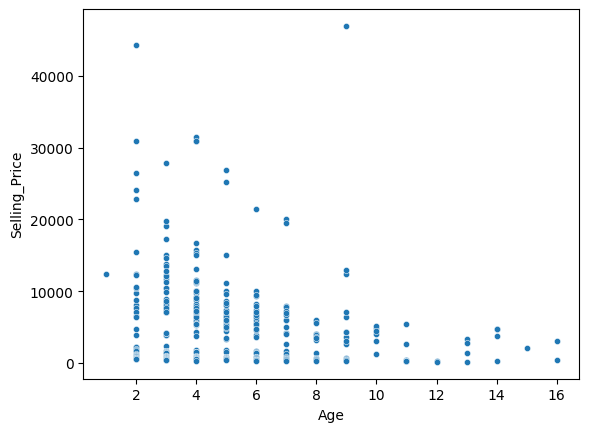

In [ ]:
# First we'll grab our handy visualization tools
import seaborn as sns

# Each dot is a single example (row) from the dataframe, with its x-value as
# `Age` and its y-value as `Selling_Price`.
sns.scatterplot(data=car_data, x='Age', y='Selling_Price', s=20)

###*2.1.1. Discussion Exercise*

In [ ]:
#@markdown *Data science is about understanding stories by looking at data visualizations. What do you hypothesize is going on in the scatter plot above?*

answer = "This graph reveals 2 trends about the data set, as the age of the cars increase they become cheaper. As well as less being prevalent." # @param {"type":"string"}
handle_discussion_response(answer)

Your answer:

-------------------------------------------------------------
This graph reveals 2 trends about the data set, as the age of
the cars increase they become cheaper. As well as less being
prevalent.
-------------------------------------------------------------

If you haven't already, discuss with your classmates!


## 2.2. Categorical Plots

Note that scatter plots only work if both of the features that we're plotting are numerical and don't fit into categories!

Some of our features, like `Transmission`, are instead *categorical* features, because their values can only fit in certain categories. `Transmission`, for example, can only be `Manual` or `Automatic` in our dataset.

### *2.2.1. Discussion Exercise*

In [ ]:
#@markdown *Which of the other variables from our data table are categorical?*

answer = "" # @param {"type":"string"}
handle_discussion_response(answer)

Please input your response in the answer box above!


Since scatter plots won't work here, there's a specific type of plot for visualizing categorical features. This is `catplot`, the template for which is below and may look familiar!

```python
sns.catplot(data=DATAFRAME, x='X_FEATURE', y='Y_FEATURE')
```

Run the cell below to plot **selling price** vs. **transmission** this time!

>*Note*: In addition to `s=4`, we also include the optional `kind='swarm'` input. This causes the points to spread wherever they have the same values, so that there's no overlap and we get a better idea of the data distribution.

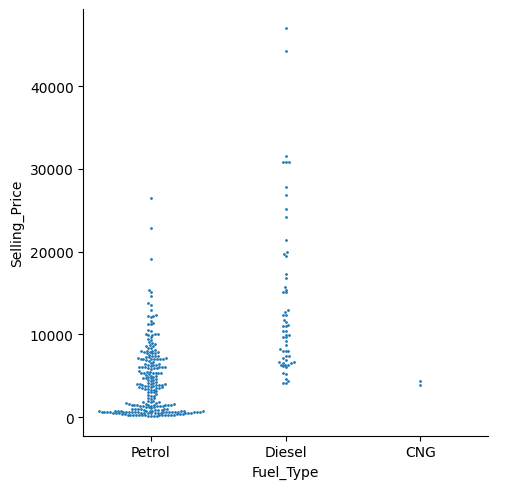

In [ ]:
sns.catplot(data=car_data, x='Fuel_Type', y='Selling_Price', s=4, kind='swarm')

### *2.2.2. Discussion Exercise*



In [ ]:
#@markdown *What do you take away from the plot above?*

answer = "Diesel is less popular but more expensive" # @param {"type":"string"}
handle_discussion_response(answer)

Your answer:

-------------------------------------------------------------
Diesel is less popular but more expensive
-------------------------------------------------------------

If you haven't already, discuss with your classmates!


### *(Optional Challenge) 2.2.3. Coding Exercise*

>Try this exercise out if you would like a coding challenge to see how much data are in each category of `Fuel_Type`.

Using the `.groupby()` method in Pandas, count the number of Petrol vs. Diesel vs. CNG cars in your dataset

*Hint*: Try looking at the [`.groupby()` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html). The `.size()` or `.count()` methods can also come in handy!

In [ ]:
### WRITE YOUR CODE BELOW



### *2.2.4. Coding Exercise️*

How do you think price will vary with `Kms_Driven`?

Check your hypothesis against a plot!


<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

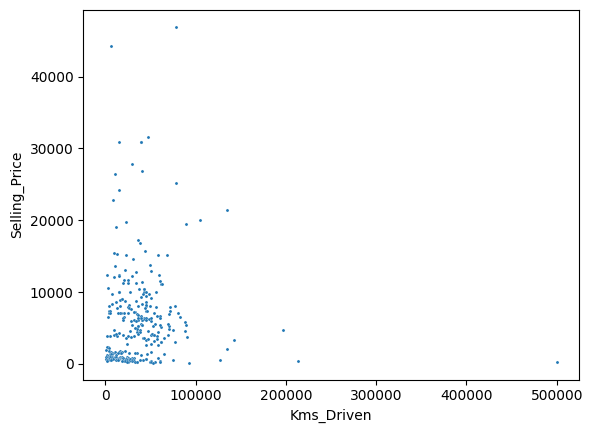

In [ ]:
### WRITE YOUR CODE BELOW
sns.scatterplot(data=car_data, x='Kms_Driven', y='Selling_Price', s=5)


### *2.2.5. Discussion Exercise*

Now that we've looked at our data for a few variables, let's take a step back, and ask the following questions:

In [ ]:
#@markdown *1. How do we expect the price of a car to change as we change the `Seller_Type`?*
answer_1 = "When cars are sold by a dealer the price of the cars would be higher compared to an individual " # @param {"type":"string"}

#@markdown *2. What about `Transmission`?*
answer_2 = "I think that an automatic transition would be the lower priced cars, but the lowers would be automatic and the highest would be automatic" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2)

Your answers:

------------------------------1------------------------------
When cars are sold by a dealer the price of the cars would be
higher compared to an individual
-------------------------------------------------------------

------------------------------2------------------------------
I think that an automatic transition would be the lower
priced cars, but the lowers would be automatic and the
highest would be automatic
-------------------------------------------------------------

If you haven't already, discuss with your classmates!


### *2.2.6. Coding Exercise*

Let's try investigating whether our hypotheses were correct using Seaborn!

*Hint*: Can you figure out what plotting function we should use for `Selling_Price` vs. `Seller_Type`?  What about for `Selling_Price` vs. `Transmission`? What type of data are we plotting?

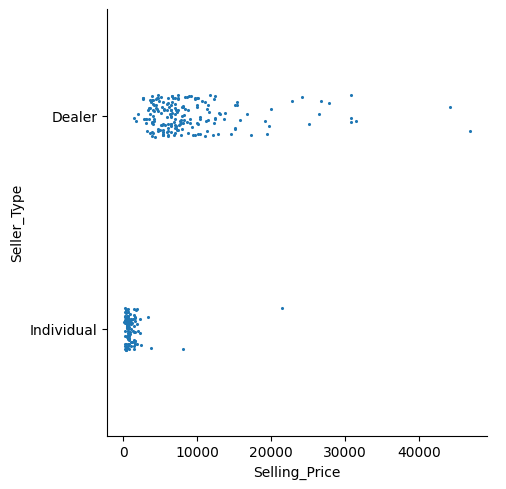

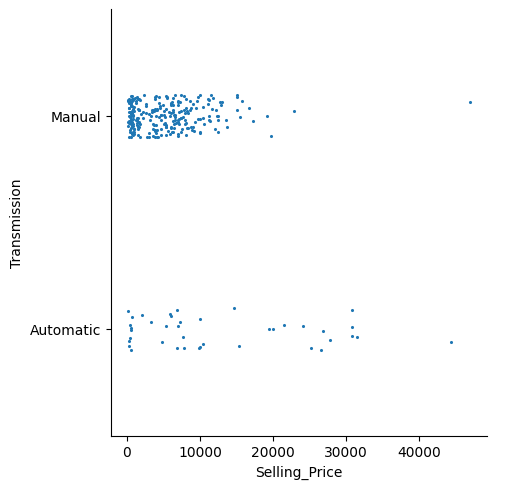

In [ ]:
### WRITE YOUR CODE BELOW
car_data.head()
sns.catplot(data=car_data, x='Selling_Price', y='Seller_Type',s=5)
sns.catplot(data=car_data, x='Selling_Price', y='Transmission',s=5)

---
---
# **📏 Milestone 3: Applying Linear Regression**


## 3.1. Linear Regression Review

Linear regression is a statistical approach to find and determine a relationship among an independent variable $x$ and a dependent variable $y$. For now, we will set our $x$ as `Age` and our $y$ as `Selling_Price`.

In the below equation, linear regression helps us find the $m$ and $b$ that best relates our variables. In other words, we are trying to find a "line of best fit" for our variables $x$ and $y$.

$$y= mx + b$$

Another way to say this: we create a line that "summarizes" the story that the data tells us, like so:

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png">
</center>



[**Let's explore linear regression through a demo!**](http://setosa.io/ev/ordinary-least-squares-regression/)

>You might have spent some time on this site during lecture! We ***highly recommend*** you take some time to play around with this on your own as well.



## 3.2. Linear Regression in Python

Before we start to code our linear regression model, let's first define the `X` and `y` we want to use in our linear regression. In the code cell below, we define our `X` as the `Age` column, and `y` as the `Selling_Price`, since our goal is to see how age predicts a car's value.

Run the code cell below to see what `X` and `y` look like!

In [ ]:
# Initializing our X and y variables.
X = car_data[['Age']]
y = car_data[['Selling_Price']]

# Printing our X and y variables
print(X)
print(y)

     Age
0      5
1      6
2      2
3      8
4      5
..   ...
296    3
297    4
298   10
299    2
300    3

[301 rows x 1 columns]
     Selling_Price
0             4495
1             6373
2             9727
3             3824
4             6172
..             ...
296          12746
297           5367
298           4495
299          15430
300           7111

[301 rows x 1 columns]


Now we can train our linear regression on this data! To do this, we'll be using another library called `sklearn`. You'll be using this library very often throughout your work in these notebooks, as it makes the machine learning process very simple.

In the code cell below, we import the specific model we need:

In [ ]:
# Let's pull our handy linear fitter from our 'prediction' toolbox: sklearn!
from sklearn.linear_model import LinearRegression

In this code cell, we set up our model and store it in the variable `lin_reg_model`, followed by training the model we saved by using the `.fit()` method. As you'll see in other notebooks, these steps will be basically the same for any other model you use in `sklearn`!

In [ ]:
# Set up our model, saving it to the `linear` variable
lin_reg_model = LinearRegression()

# Train the model, passing in the data for it to learn from
lin_reg_model.fit(X, y)

LinearRegression()

And just like that, `sklearn` has handled all of the math for linear regression behind the scenes, and we now have the line of best fit stored in our `lin_reg_model` variable. The code cell below will plot that line of best fit on the data for you:

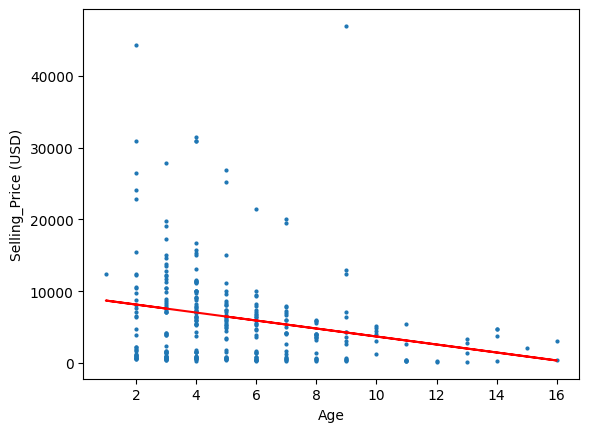

In [ ]:
#@markdown ### Visualize the fit by running this cell!
import matplotlib.pyplot as plt

y_pred = lin_reg_model.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y, s=4)
plt.xlabel('Age') # set the labels of the x and y axes
plt.ylabel('Selling_Price (USD)')
plt.show()

### *3.2.1. Discussion Exercise*

In [ ]:
#@markdown *1. Does this line of best fit match what you expected when we originally looked at this plot?*
answer_1 = "No not at the start of the graph but it is similar near the end" # @param {"type":"string"}

#@markdown *2. Does the line of best fit work well for all the data?*
answer_2 = "slightly" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2)

## (Optional) 3.3. Interpreting our Model

>Try this section out if you want to know more about how to interpret the equation of our line of best fit.


Remember! We were trying to find the best $b$ and $m$ to capture our data's story. We can grab this from the trained model.

In [ ]:
print('Our m in USD/year:', lin_reg_model.coef_)

Our m in USD/year: [[-556.92786812]]


### *3.3.1. Discussion Exercise*



In [ ]:
#@markdown *1. How should we interpret the $m$ value?*
answer_1 = "The amount that it is descresing" # @param {"type":"string"}

#@markdown *2. Let's say you were deciding between a brand new car and the same model that was 3 years older. How much cheaper should the older car be according to our model?*
answer_2 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2)

Now that we've discussed $m$, we can shift our focus to $b$ to complete the equation:

In [ ]:
print('Our b in USD:', lin_reg_model.intercept_)

Our b in USD: [9245.96133806]


### *3.3.2. Discussion Exercise*


In [ ]:
#@markdown *1. How should we interpret the $b$ value?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. Using our $m$ and $b$ values, how do we find the price of the cars?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. You go to a car salesperson to buy a nice used car. The car you want is a 2018 model and they offer to sell it for \$9,500.*

#@markdown *Would you take it? If not, how much would you take it for?*
answer_3 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3)

## (Optional) 3.4. Trying Different Inputs

>Try this section out if you want to try fitting the linear regression with features other than `Age`.





In order to try some of our other inputs in linear regression, we will first need to learn how to convert categorical data into numerical data, since our models can only do their math behind the scenes on numbers. Let's first learn how to make that conversion with the `Transmission` variable.

We can easily transform `Transmission` to a numeric variable by replacing `Manual` with `1` and `Automatic` with `0`. The code cell below does just that, adding a new column to the dataset called `Transmission_Number` and displaying the updated dataset.

In [ ]:
car_data['Transmission_Number'] = car_data['Transmission'].map({'Manual':1, 'Automatic':0})
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Miles_Driven,Transmission_Number
0,ritz,5,4495,27000,Petrol,Dealer,Manual,16767.0,1
1,sx4,6,6373,43000,Diesel,Dealer,Manual,26703.0,1
2,ciaz,2,9727,6900,Petrol,Dealer,Manual,4285.0,1
3,wagon r,8,3824,5200,Petrol,Dealer,Manual,3229.0,1
4,swift,5,6172,42450,Diesel,Dealer,Manual,26361.0,1


Now we're ready to try different values for `X` instead of just the `Age` column! If we want to try a categorical variable like `Transmission`, remember to convert it to numerical!

In [ ]:
# Initializing our X, y variables
X_column = 'Age' # Feel free to try different inputs!
X = car_data[[X_column]]
y = car_data[['Transmission_Number']]

# Setting up model
lin_reg_model = LinearRegression()

# Training
lin_reg_model.fit(X, y)

LinearRegression()

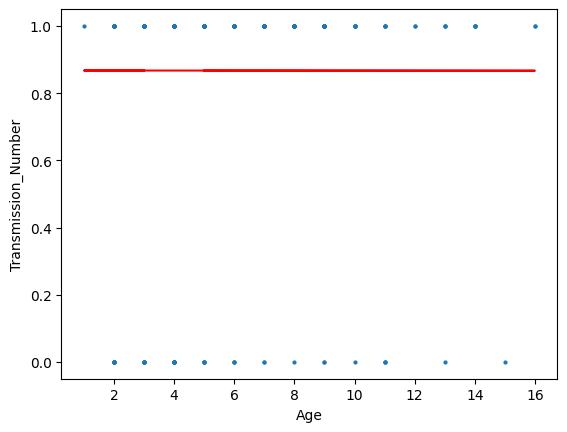

In [ ]:
#@markdown ### Visualize the fit by running this cell!
import matplotlib.pyplot as plt

y_pred = lin_reg_model.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y, s=4)
plt.xlabel(X_column) # Automated setup of axis labels
plt.ylabel('Transmission_Number')
plt.show()

## (Optional) 3.5. Multiple Linear Regression

>Try this section out if you want to try fitting the linear regression with more than just one feature.

Now that we've tried single linear regression with different inputs, we'll now try to make our model better by using multiple input variables, like `Kms_Driven` and `Transmission`.


In [ ]:
X = car_data[['Age', 'Transmission_Number', 'Kms_Driven']]

# Set up our model
multiple_lin_reg_model = LinearRegression()

# Train the model
multiple_lin_reg_model.fit(X, y)

LinearRegression()

How well did it do compared to our simple linear regression from before? We can actually compare the two with their 'scores'! The score is known as R-squared ($R^2$).

If you're unfamiliar with $R^2$, the closer to 1 the $R^2$ value is, the better the model describes the data! Feel free to refer to the optional sections as the end of lecture to learn more about what this score means.

In [ ]:
print(f'Our single linear model had an R^2 of: {lin_reg_model.score(car_data[[X_column]], y):.3f}')

Our single linear model had an R^2 of: 0.056


In [ ]:
print(f'Our multiple linear model had an R^2 of: {multiple_lin_reg_model.score(X, y):.3f}')

Our multiple linear model had an R^2 of: 0.203


In real life, you wouldn't buy a car based on a single variable like `Age`. You would take into account a lot of different variables like our multiple linear model did!

### *3.5.1. Coding Exercise*

You noticed that we did not include `Seller_Type` as one of the variables in our multiple linear regression. Figure out what steps you need to take to build a model with `Seller_Type` included. Check the $R^2$ to see if you do any better.

In [ ]:
### WRITE YOUR CODE BELOW



---
---

# **(Optional Challenge) 💰 Milestone 4: Finding The Best Deal**

>Try this section out for a more advanced coding challenge where you find the worst and best deals for cars in the dataset, according to the model you made! We suggest exploring the other optional sections before getting to this challenge.

Now that we've made a fit of each car's price using all the variables, we can now make predictions to compare each car's predicted price to its actual one. We can see which cars are a good deal, and which are overpriced!

### *4.1.1. Coding Exercise*

First, let's start by making predictions with the fit we just created earlier. Just like `.fit()` allows you to fit the model, we can use another method to get the model's predictions. Try to find that method in sklearn's documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)!

Then, let's make a scatterplot of predicted vs. real prices, using methods from `matplotlib.pyplot`, or `plt`, a more advanced plotting library.

In [ ]:
# Plotting library
import matplotlib.pyplot as plt

# Creating the plot
plt.plot([-500,18000],[-500,18000]) # Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price (USD)")
plt.ylabel("Predicted price (USD)")

### WRITE YOUR CODE BELOW

# TODO: Make our predictions using the model we just created.
prediction = None

# TODO: Fill in code here to add a scatterplot of predicted vs. real prices


### END CODE HERE

plt.show()

### *4.1.2. Discussion Exercise*




In [ ]:
#@markdown *1. Which data points seem unusual? Which cars seem most overpriced, and which seem like the best deal?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. Do the data look "linear" overall? Are predicted prices equally likely to lie above or below the true price, no matter where we are in the graph?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. Some predicted prices seem impossible - which ones?*
answer_3 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3)

These issues suggest that, no matter what our $R^2$ says, linear regression might not be the best model for this situation. A more complex model could make more accurate predictions.

For now, let's stick with our linear regression. Let's add our predicted prices on to our data frame:

In [ ]:
car_data['Prediction'] = prediction
car_data.head()

### *4.1.3. Coding Exercise*

Now - assuming for now that the predicted scores are good ones - let's figure out the cars that are especially good or bad deals by comparing the real price to the predicted price.

Come up with a way to calculate the "Deal Score", and add a new column to the data frame. A car with a high `Deal_Score` has a low true cost compared to its predicted value, while a car with a low `Deal_Score` is overpriced.

In [ ]:
car_data['Deal_Score'] = None ### YOUR CODE HERE (Replace the None!)
print(car_data)

### *4.1.4. Coding Exercise*
Using the Pandas `.sort_values()` method, identify the 10 most overpriced cars and the 10 cars that are the best deal.

In [ ]:
### WRITE YOUR CODE BELOW

# Sort the data using .sort_values():


# Get the best and worst cars from the sorted dataset (Replace the Nones!):
best_deals = None
most_overpriced = None

### END CODE HERE

print(best_deals)
print(most_overpriced)

### *4.1.5. Coding Exercise*

Here's the graphing code again from earlier. This time, plot the best deals in one color, the most overpriced cars in another color, and the other cars in a third color. Do your calculations align with your guesses from looking at the graph? What happens if you change your method of calculating the Deal Score?

In [ ]:
plt.plot([-500,18000],[-500,18000]) # Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price (USD)")
plt.ylabel("Predicted price (USD)")

### WRITE YOUR CODE BELOW: Make a scatterplot with several colors

# Show 10 best deals in one color:


# Show 10 most overpriced in another color:


# Show the other cars in a third color:


### END CODE HERE

plt.show()

Congratulations! You've now identified the cars that are the best buy.

... Or have you? Why might a car have a lower-than-predicted price, besides a seller making a mistake?

What other data would you need to be really confident in your decision?

---
---

# 🤔 Knowledge Check

Great job getting through this notebook! If you have time, feel free to go back to the optional sections before this section to delve deeper.

Feel free to use the below questions to ensure you've learned everything from this notebook!




In [ ]:
#@markdown *1. In this notebook, you learned about Scikit-learn. What is it useful for?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. What does a row describe in a dataset's table? What about a column?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. When should you use a scatter plot vs. a categorical plot?*
answer_3 = "" # @param {"type":"string"}

#@markdown *4. What is the difference between `X` and `y` with a model?*
answer_4 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3, answer_4)

If you went through the optional/advanced sections, you can try these questions out too!

In [ ]:
#@markdown *1. What are $m$ and $b$ in the equation of the line ($y=mx+b$)?*
answer_1 = "" # @param {"type":"string"}

#@markdown *2. If your line fit the data perfectly, what would be the $R^2$ value?*
answer_2 = "" # @param {"type":"string"}

#@markdown *3. What's the difference between single linear regression and multiple linear regression?*
answer_3 = "" # @param {"type":"string"}

handle_discussion_response(answer_1, answer_2, answer_3)

---
---

# 📋 Extra Resources

Feel free to use the following cheat sheets as a quick reference!

- [Pandas Cheat Sheet](https://docs.google.com/document/d/1NK3wvy9pnpg6vab6AkdzLwGSsNf31NSIsrEYz1IVljk/edit?pli=1&tab=t.orx50ha0fjl)
- [Seaborn Cheat Sheet](https://docs.google.com/document/d/1NK3wvy9pnpg6vab6AkdzLwGSsNf31NSIsrEYz1IVljk/edit?pli=1&tab=t.e55d63tet353)
- [Scikit-learn Pipeline Cheat Sheet](https://docs.google.com/document/d/1NK3wvy9pnpg6vab6AkdzLwGSsNf31NSIsrEYz1IVljk/edit?tab=t.53r5m2rr4htd)

Note that there are more cheat sheets on this document that aren't relevant until later in the program, but feel free to start looking through everything!


If you want more practice with basic coding, check out these notebooks:

- Intro to Coding: [Python Turtle Notebook](https://inspiritai.co/student_python_turtle)
- Intro to Python: [Python Basics Notebook](https://inspiritai.co/student_python_basics)
- Intro to AI Fundamentals: [AI Fundamentals Notebook](https://inspiritai.co/student_ai_fundamentals_in_python)